# 3. MultiVariate Linear Regression (다중 회귀 분석)

## 다중회귀분석 : 각 독립변수(x1,,,x6)와 상수항(B1)에 적절한 값들을 찾아서 모형을 완성

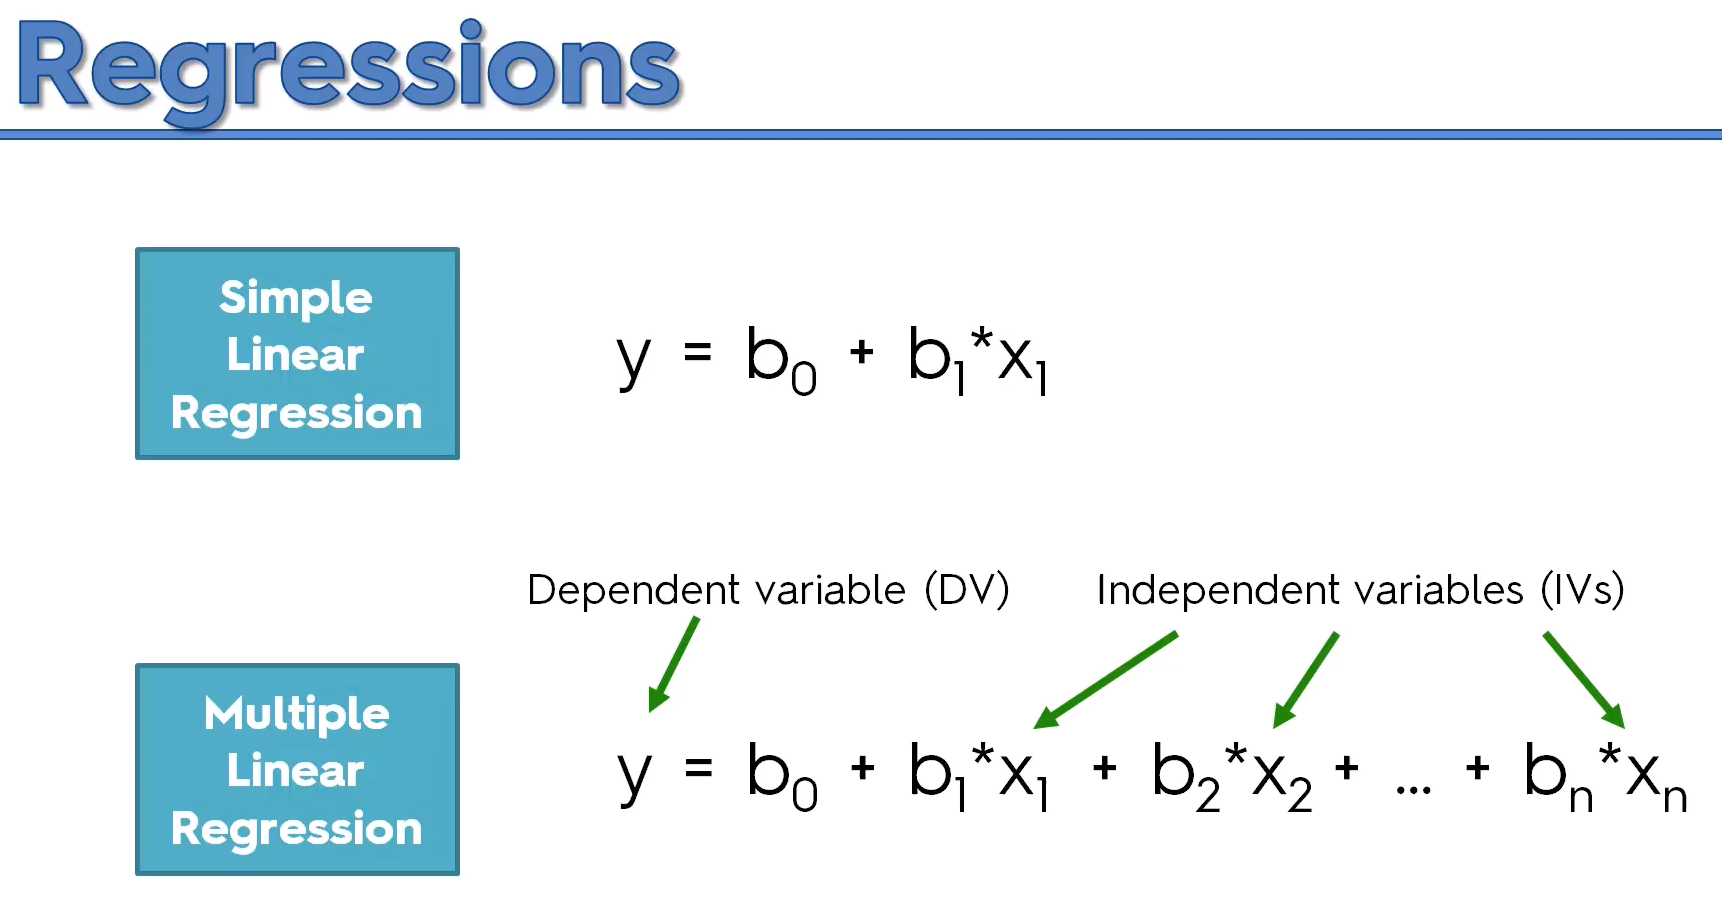

In [4]:
from IPython.display import Image
Image("datasets/multi.png",width=700)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step1 : 데이터 준비- read_csv()을 통해서 자동차 연비

In [6]:
# CSV 파일을 데이터 프레임으로 변환
df=pd.read_csv("datasets/auto-mpg.csv",header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
# 열이름 지정
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
#IPython 디스플레이 설정- 출력할 열의 갯수 한도 늘리기

pd.set_option('display.max_columns',10)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## STEP2 : 데이터 탐색

In [9]:
df.info() #데이터 자료형확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe() #데이터 통계요약 정보 확인

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df['horsepower'].unique() #horepower열의 고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
df['horsepower'].replace("?",np.nan,inplace=True) #'?'=> nan으로 변경
df.dropna(subset=['horsepower'],axis=0, inplace=True) #누락데이터 삭제
df['horsepower']=df['horsepower'].astype("float")

In [13]:
df.describe() #데이터 통계요약 정보 확인

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Step3 : 속성(feature, varaible)

In [14]:
#분석에 활용할 열(속성,컬럼) 을 선택 (연비, 실린더, 마력, 중량)

ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


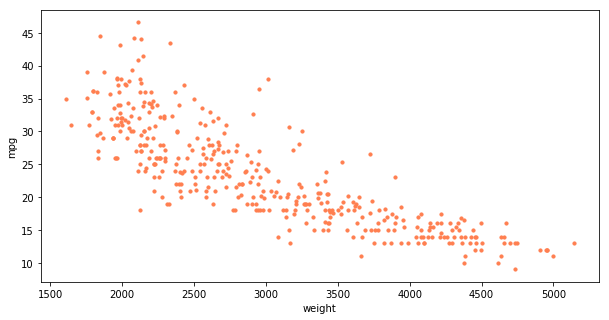

In [15]:
# 종속변수(Y)인 '연비' 와 다른 변수간의 선형관계를 그래프로 확인

ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.show()
plt.close()

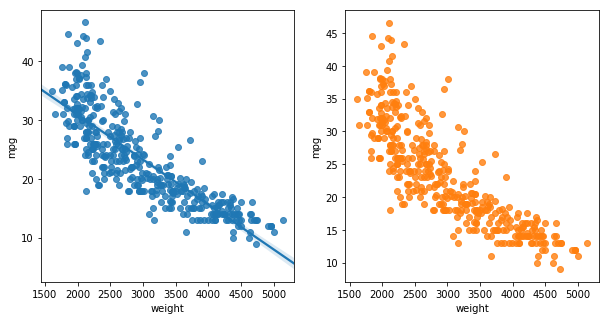

In [16]:
# seaborn으로 산점도 그리기
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1) #회귀선 표시
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2,fit_reg=False) #미표시
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


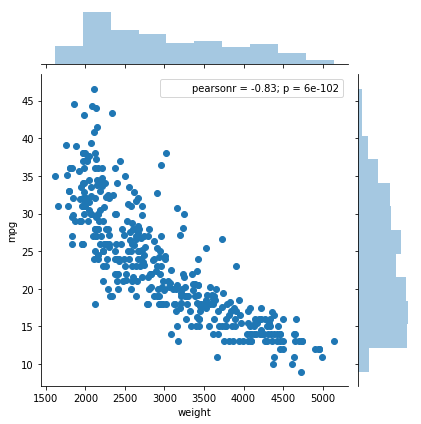

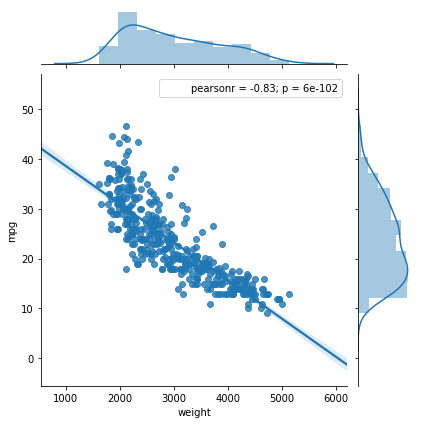

In [17]:
#seaborn joint 그래프 -산점도, 히스토그램
sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',data=ndf,kind='reg')
plt.show()
plt.close()


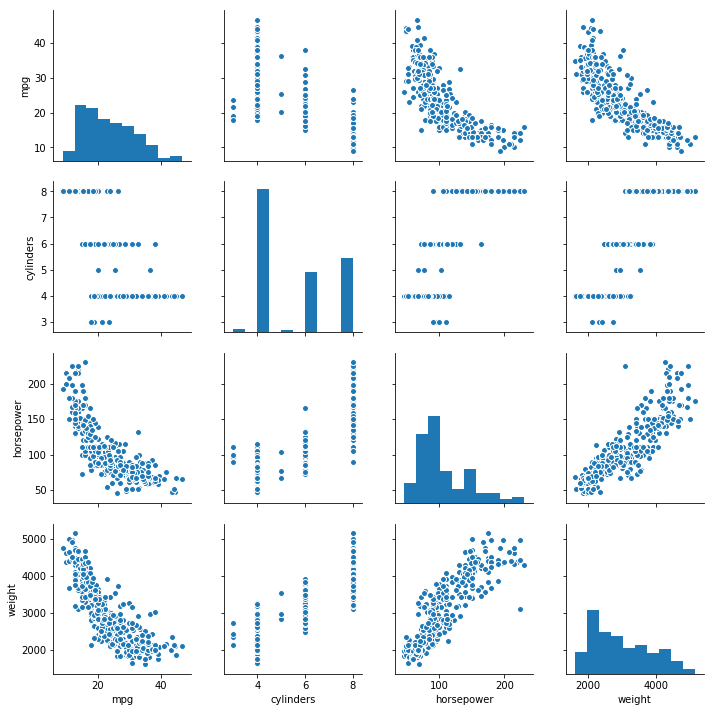

In [18]:
# seaborn pairplot()으로 두 변수간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

## Step4 : 데이터셋 구분 - 훈련용(train data) / 검증용 (test data)

In [19]:
# 속성(컬럼, 변수) 선택
x=ndf[['cylinders','horsepower','weight']] # 독립변수 X1,X2,X3
y= ndf['mpg']

In [20]:
#train dat : test data = 7:3

from sklearn.model_selection import train_test_split
# test_size=0.3 : 검증용 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print("train data수 : ",x_train.shape)
print("test data수 : ",x_test.shape)


train data수 :  (274, 3)
test data수 :  (118, 3)


## Step5 : 단순 희귀 분석 Model - sklearn 사용

In [28]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [29]:
print("원 데이터 : ",x_train.shape)
print("2차항 변환 데이터 : ",x_train_poly.shape)

원 데이터 :  (274, 3)
2차항 변환 데이터 :  (274, 10)


In [30]:
lr.fit(x_train,y_train) #train data를 가지고 모형학습(train)-fitting (model fitting)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#학습을 마친 모델의 Test Data를 적용하여 결정계수 (R-제곱) 계산

r_square=lr.score(x_test,y_test)
r_square

0.6939048496695597

In [32]:
# 회귀석의 기울기
print("기울기 a: ",lr.coef_)

기울기 a:  [-0.60691288 -0.03714088 -0.00522268]


In [33]:
#회귀식의 y 절편(intercept)
print(" y 절편 b ",lr.intercept_)

 y 절편 b  46.41435126963408


### y= -0.0077z*x+46.71
###  모델에 전체 데이터를 입력하여 예측한 값을 실제값과 비교

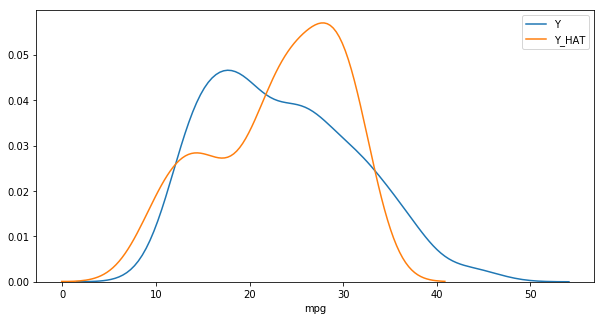

In [34]:
x_poly=poly.fit_transform(x)
y_hat=lr.predict(x_test)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False,label="Y")
ax2=sns.distplot(y_hat,hist=False,label="Y_HAT",ax=ax1)
plt.show()
plt.close()

### 결과 해석 : 오차가 있지만, 어느한쪽으로 편향되는 경향이 많이 줄어 사용가능한 모형이다.